<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_lectures/blob/main/HW_2_1_Linear_regression_on_multiple_variables_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/cars.csv')
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
print('Іформація про всі колонки:')
df.info()

Іформація про всі колонки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
def df_report(df):
  report = {'numerical columns': df.columns[df.dtypes == "int"].to_list(),
            'numerical column count': sum(df.dtypes == "int"),
            'categorical columns': df.columns[df.dtypes == "object"].to_list(),
            'categorical columns count': sum(df.dtypes == "object"),
            'categorical binar columns': [],
            'categoracal multicategor columns': [],
            #'categorical order columns':[]
            }

  df_columns_report = {'column name': [],
                      'column type': [],
                      'number of unique values': [],
                      'values or range of values (min, max)':[]
                      }

  for column in df.columns:
    df_columns_report['column name'].append(column)
    df_columns_report['column type'].append(df[column].dtypes)
    df_columns_report['number of unique values'].append(df[column].nunique())
    if df[column].dtypes == 'object':
      column_values = df[column].unique()
      df_columns_report['values or range of values (min, max)'].append(column_values)
      if len(column_values) == 2:
        report['categorical binar columns'].append(column)
      else:
        report['categoracal multicategor columns'].append(column)
    else:
      df_columns_report['values or range of values (min, max)'].append((df[column].min(), df[column].max()))

  from tabulate import tabulate

  print(tabulate(report.items(), headers=['Сriterion name', 'Value'], tablefmt='grid'), end = '\n\n')


  df_report_result = pd.DataFrame(df_columns_report)
  return df_report_result

In [5]:
df_report(df)

+----------------------------------+-----------------------------------------------------------------------------------------+
| Сriterion name                   | Value                                                                                   |
+==================================+=========================================================================================+
| numerical columns                | ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'] |
+----------------------------------+-----------------------------------------------------------------------------------------+
| numerical column count           | 8                                                                                       |
+----------------------------------+-----------------------------------------------------------------------------------------+
| categorical columns              | ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']             

,column name,column type,number of unique values,"values or range of values (min, max)"
0,Car_ID,int64,100,"(1, 100)"
1,Brand,object,11,"[Toyota, Honda, Ford, Maruti, Hyundai, Tata, M..."
2,Model,object,58,"[Corolla, Civic, Mustang, Swift, Sonata, Nexon..."
3,Year,int64,6,"(2016, 2021)"
4,Kilometers_Driven,int64,18,"(10000, 60000)"
5,Fuel_Type,object,2,"[Petrol, Diesel]"
6,Transmission,object,2,"[Manual, Automatic]"
7,Owner_Type,object,3,"[First, Second, Third]"
8,Mileage,int64,15,"(10, 25)"
9,Engine,int64,36,"(999, 4951)"


**Висновок:**
В наборі даних 8 числових та 5 категоріальних колонок, з них:
- 2 бінарні (мають лише 2 значення): Fuel_Type та Transmission
- 2 мультикатегоріальні (більше 2х значень) зі значеннями, для яких немає відношення порядку: Brand і Model
- 1 колонка, в якій можна встановити відношення порядку:  Owner_Type зі значеннями: [First, Second, Third]

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price', 'Car_ID'], axis = 1)
y = df.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [7]:
# Кодування Fuel_Type
most_common_fuel = X_train['Fuel_Type'].value_counts().idxmax()
X_train['Fuel_Type_code'] = (X_train['Fuel_Type'] == most_common_fuel).astype(int)
X_test['Fuel_Type_code'] = (X_test['Fuel_Type'] == most_common_fuel).astype(int)

# Кодування Transmission
most_common_trans = X_train['Transmission'].value_counts().idxmax()
X_train['Transmission_code'] = (X_train['Transmission'] == most_common_trans).astype(int)
X_test['Transmission_code'] = (X_test['Transmission'] == most_common_trans).astype(int)

In [8]:
# Кодування Brand
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder() # Створення екземпляру кодувальника — об'єкт enc, який буде знати, як кодувати категорії
enc.fit(X_train[['Brand']]) # "Навчання" кодувальника на колонці 'Brand' з тренувального набору. Тепер enc знає всі  категорії, в якому вони порядку, і як їх кодувати.
X_train[enc.categories_[0]] = enc.transform(X_train[['Brand']]).toarray()
X_test[enc.categories_[0]] = enc.transform(X_test[['Brand']]).toarray()

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [10]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [11]:
df.groupby('Brand').Model.nunique()

,Model
Brand,
Audi,6
BMW,6
Ford,6
Honda,4
Hyundai,6
Mahindra,3
Maruti,4
Mercedes,5
Tata,6


In [12]:
df.groupby('Brand').Model.unique()

,Model
Brand,
Audi,"[A4, Q3, A6, A3, Q7, A5]"
BMW,"[X1, 5 Series, X3, 7 Series, X5, 3 Series]"
Ford,"[Mustang, Endeavour, Figo, Aspire, Ranger, Eco..."
Honda,"[Civic, City, WR-V, BR-V]"
Hyundai,"[Sonata, Creta, Verna, Elantra, Santro, Venue]"
Mahindra,"[Scorpio, Thar, XUV300]"
Maruti,"[Swift, Ertiga, Vitara, S-Cross]"
Mercedes,"[C-Class, GLC, E-Class, GLE, GLA]"
Tata,"[Nexon, Harrier, Altroz, Safari, Tigor, Tiago]"


***Кодування колонки Model***

Колонка містить 58 унікальних значень і додавати більше 50 стовбчиків за допомогою OneHotEncoder  недоцільно. Можна використати двійкове кодування: значення від 1 до 58 записуються двійковими числами, 58 в двійковій системі 111010 має шість розрядів, для кодування таких значень достатньо шести нових колонок.

В даних модель автомобіля пов'язана з назвою бренду. І для кожного з брендів представлено максимум шість моделей. Тому можна скористатися двійковим кодуванням для кожного бренду окремо. В такому випадку максимальне значення 6 буде закодоване як 110 і потребує всього три нові стовбчики для представлення таких даних.

Існують і інші способи кодування подібних категоріальних даних та саме цей спосіб гарантує збереження початкової інформації з мінімальним перетворенням (тут би ще і бренди закодувати двійковим кодуванням, це б зменшило кількість колонок з 11 до 4) - треба буде зробити :-).

In [13]:
# ! pip install category_encoders

In [14]:
# Створення словника з двійковими кодами для моделей різних брендів
model_encoding_dict = {}
max_bits = int(np.ceil(np.log2(df.groupby('Brand').Model.nunique().max())))
bit_cols = [f'Model_bin_{i}' for i in range(max_bits)]

for brand in df['Brand'].unique():
    models = sorted(df[df['Brand'] == brand]['Model'].unique())
    model_codes = {}

    for i, model in enumerate(models, start = 1):
        binary = list(map(int, list(np.binary_repr(i, width=max_bits))))
        model_codes[model] = binary

    model_encoding_dict[brand] = model_codes

In [15]:
df_coder = pd.DataFrame(model_encoding_dict)
df_coder.shape # Перевірка чи всі моделі закодовано

(58, 11)

In [16]:
df_coder

,Toyota,Honda,Ford,Maruti,Hyundai,Tata,Mahindra,Volkswagen,Audi,BMW,Mercedes
Camry,"[0, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Corolla,"[0, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fortuner,"[0, 1, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Innova,"[1, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Innova Crysta,"[1, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yaris,"[1, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR-V,NaN,"[0, 0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,NaN,"[0, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Civic,NaN,"[0, 1, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WR-V,NaN,"[1, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
def encode_model(row):
  """
  Функція для кодування
  """
  brand = row['Brand']
  model = row['Model']
  if brand in model_encoding_dict:
      codebook = model_encoding_dict[brand]
      if model in codebook:
          return codebook[model]
  # Якщо бренд або модель невідомі — повертаємо [0, 0, 0]
  return [0] * max_bits # Це більше перевірка на помилку в коді

In [18]:
# Заповнення нових стовбчиків нулями
for col in bit_cols:
    X_train[col] = 0
    X_test[col] = 0

# Зміна на закодовані значення
X_train[bit_cols] = X_train.apply(encode_model, axis=1, result_type='expand')
X_test[bit_cols] = X_test.apply(encode_model, axis=1, result_type='expand')

In [19]:
pd.set_option('display.max_columns', 100)
display(X_test[['Brand',	'Model', 'Model_bin_0',	'Model_bin_1',	'Model_bin_2']].head(10)) # Значення, щоб звіритися зі словником

,Brand,Model,Model_bin_0,Model_bin_1,Model_bin_2
17,Audi,Q3,1,0,1
41,Hyundai,Santro,0,1,1
92,Volkswagen,Vento,1,1,0
14,Maruti,Ertiga,0,0,1
68,Ford,Aspire,0,0,1
31,Hyundai,Elantra,0,1,0
89,Hyundai,Venue,1,0,1
15,Honda,City,0,1,0
21,Ford,Figo,1,0,0
60,Hyundai,Verna,1,1,0


In [20]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,1
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,1


(None, None)

In [21]:
X_train.shape, X_test.shape

((80, 28), (20, 28))

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [22]:
df_train = pd.concat([X_train.select_dtypes(['int', 'float']), y_train], axis = 1)
corr_matrix = df_train.corr()
price_corr = df_train.corr().iloc[-1, :-1]
price_corr[price_corr.abs() > 0.5].sort_values()

,Price
Mileage,-0.638404
Transmission_code,0.680731
Engine,0.710561
Power,0.849137


In [23]:
corr_matrix

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2,Price
Year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.150353,-0.070008,0.232921,-0.233769
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,0.086046,0.135988,-0.192994,-0.083951
Mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.104811,-0.017872,-0.034455,-0.638404
Engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.195960,0.035766,0.059184,0.710561
Power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.266739,-0.110142,0.086471,0.849137
Seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,-0.029746,0.007591,0.044817,0.000979
Fuel_Type_code,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,0.103973,-0.349593,0.098433,-0.110782
Transmission_code,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,-0.126071,0.005775,0.085553,0.680731
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.041996,0.008336,-0.025071,0.328858
BMW,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.048475,0.283188,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,0.004984,0.048475,0.092235,0.477522


**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [24]:
X_train = X_train.select_dtypes(['int', 'float'])
X_test = X_test.select_dtypes(['int', 'float'])

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  root_mean_squared_error
lr = LinearRegression().fit(X_train, y_train)
predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)
print(f'rmse_train = {root_mean_squared_error(predictions_train, y_train)}')
print(f'rmse_test = {root_mean_squared_error(predictions_test, y_test)}')

rmse_train = 209567.75578770583
rmse_test = 256802.21174231052


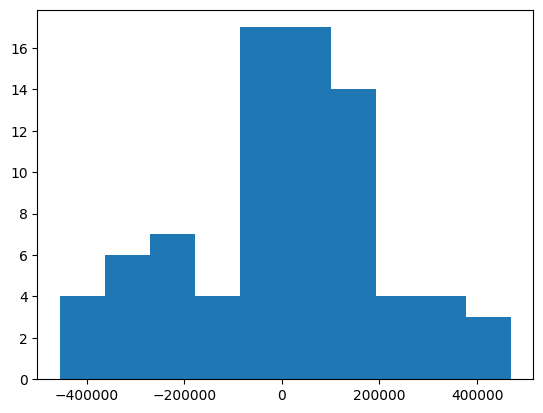

In [26]:
errors_train = predictions_train -  y_train
plt.hist(errors_train)
plt.show()

(array([2., 4., 0., 3., 3., 3., 0., 1., 1., 3.]),
 array([-355148.3526554 , -272697.26695005, -190246.18124469,
        -107795.09553933,  -25344.00983397,   57107.07587139,
         139558.16157674,  222009.2472821 ,  304460.33298746,
         386911.41869282,  469362.50439817]),
 <BarContainer object of 10 artists>)

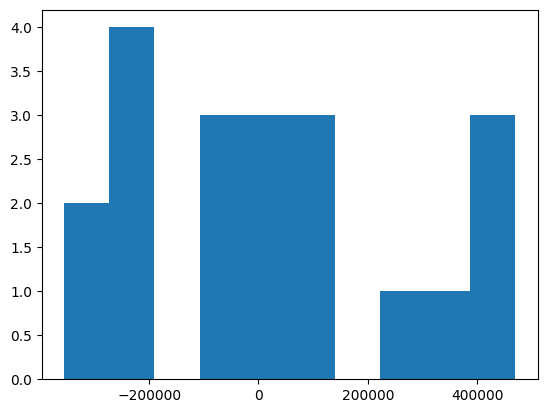

In [27]:
errors_test = predictions_test -  y_test
#plt.plot(errors_test, 'o');
plt.hist(errors_test)

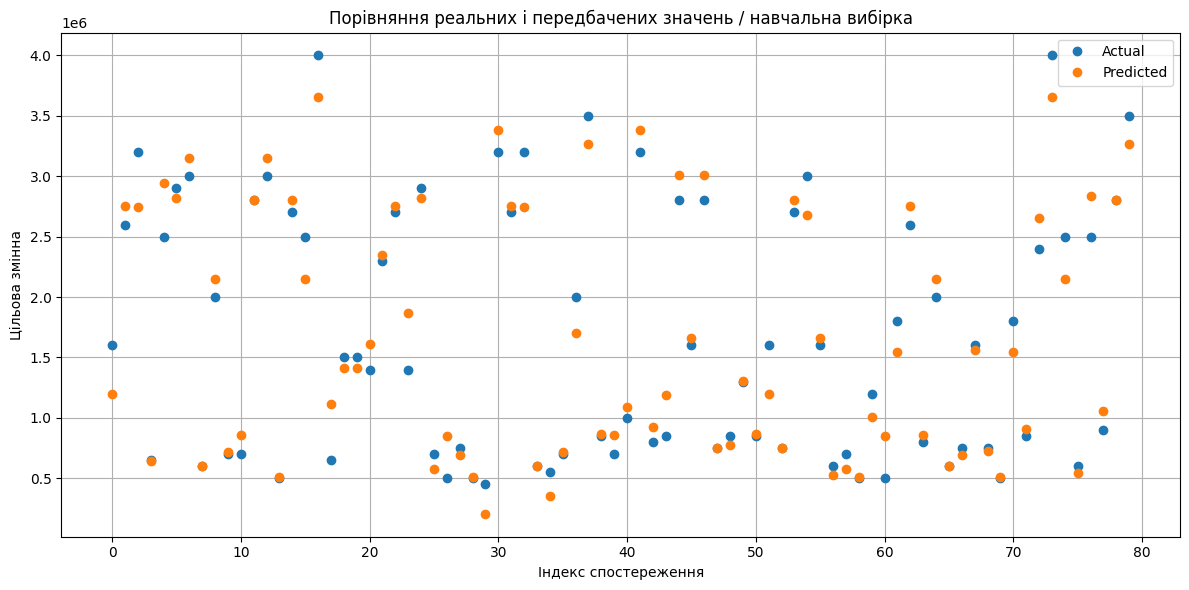

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_train.values, label='Actual', marker='o', linestyle='None')
plt.plot(predictions_train, label='Predicted', marker='o', linestyle='None')
plt.title('Порівняння реальних і передбачених значень / навчальна вибірка')
plt.xlabel('Індекс спостереження')
plt.ylabel('Цільова змінна')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

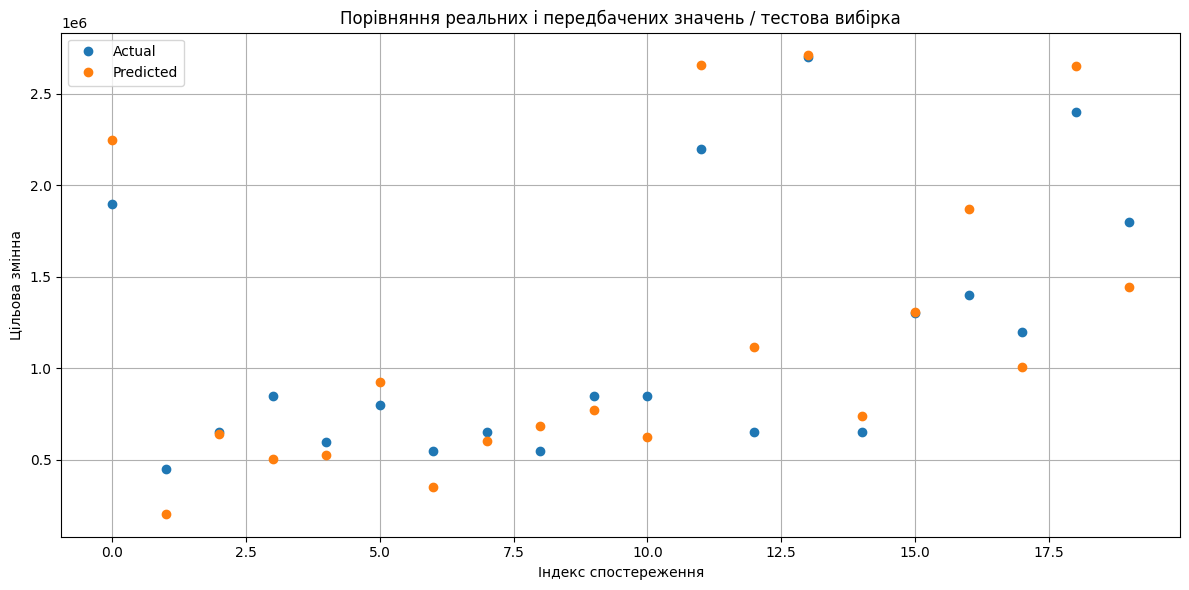

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o', linestyle='None')
plt.plot(predictions_test, label='Predicted', marker='o', linestyle='None')
plt.title('Порівняння реальних і передбачених значень / тестова вибірка')
plt.xlabel('Індекс спостереження')
plt.ylabel('Цільова змінна')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [30]:
columns_for_Scaler = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Owner_Type_Codes']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[columns_for_Scaler])

X_train[columns_for_Scaler] = scaler.transform(X_train[columns_for_Scaler])
X_test[columns_for_Scaler] = scaler.transform(X_test[columns_for_Scaler])

display(X_train.head(), X_test.head())

# scaled_inputs_train = scaler.transform(X_train[columns_for_Scaler])
# scaled_inputs_test = scaler.transform(X_test[columns_for_Scaler])

# X_col = ['Fuel_Type_code', 'Transmission_code', 'Audi', 'BMW', 'Ford', 'Honda',
#        'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
#        'Volkswagen', 'Model_bin_0', 'Model_bin_1', 'Model_bin_2']
# X_train_data = X_train[X_col].values
# X_test_data = X_test[X_col].values

# X_train = np.concatenate((scaled_inputs_train, X_train_data), axis=1)
# X_test = np.concatenate((scaled_inputs_test, X_test_data), axis=1)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
83,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.535303,1,0,0
55,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.994135,0,1,1
26,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.994135,1,0,0
54,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.535303,1,1,0
19,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.535303,1,0,0


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_bin_0,Model_bin_1,Model_bin_2
17,-2.107952,1.051030,-0.604696,-0.785333,-0.231967,-0.303562,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.535303,1,0,1
41,0.568813,-0.257646,0.861234,-1.255859,-1.214487,-0.303562,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.064742,0,1,1
92,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.535303,1,1,0
14,1.461068,-1.130096,0.568048,-0.683310,-0.784634,2.394771,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.994135,0,0,1
68,0.568813,-0.257646,0.861234,-1.091404,-0.895168,-0.303562,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.064742,0,0,1


In [31]:
lr = LinearRegression().fit(X_train, y_train)
predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)
print(f'rmse_train = {root_mean_squared_error(predictions_train, y_train)}')
print(f'rmse_test = {root_mean_squared_error(predictions_test, y_test)}')

rmse_train = 209567.75578770618
rmse_test = 256802.21174230677


In [32]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression().fit(inputs, targets)
  predictions = model.predict(inputs)
  loss = root_mean_squared_error(targets, predictions)
  print('Loss:', loss)
  return model

In [33]:
model = train_model_show_rmse(X_train, y_train)

Loss: 209567.75578770618


In [35]:
column_names = list(X_train.columns)
weights_df = pd.DataFrame({
    'feature': np.append(column_names, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
23,1,1.577346e+06
8,Audi,7.429146e+05
9,BMW,7.373648e+05
15,Mercedes,7.311762e+05
4,Power,4.928239e+05
7,Transmission_code,2.433515e+05
17,Toyota,1.231807e+05
22,Model_bin_2,5.480587e+04
20,Model_bin_0,3.525382e+04
21,Model_bin_1,3.435439e+04


**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [36]:
import statsmodels.api as sm
def df_statsmodels(X, y):
  X = sm.add_constant(X)
  model = sm.OLS(y,X)
  results = model.fit()
  print('Параметри:')
  print(results.params)
  print(results.summary())
  return results

In [37]:
results1 = df_statsmodels(X_train, y_train)

Параметри:
const                1.445901e+06
Year                -2.319949e+04
Kilometers_Driven   -1.008313e+05
Mileage             -1.347348e+05
Engine              -3.390064e+04
Power                4.928239e+05
Seats               -1.044428e+03
Fuel_Type_code      -3.596194e+05
Transmission_code    2.433515e+05
Audi                 8.743601e+05
BMW                  8.688103e+05
Ford                -1.746254e+05
Honda               -6.149086e+04
Hyundai             -3.777885e+05
Mahindra            -4.357453e+05
Maruti              -2.402593e+05
Mercedes             8.626217e+05
Tata                -1.155980e+04
Toyota               2.546262e+05
Volkswagen          -1.130484e+05
Owner_Type_Codes     3.224860e+04
Model_bin_0          3.525382e+04
Model_bin_1          3.435439e+04
Model_bin_2          5.480587e+04
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959


In [38]:
results1.rsquared, results1.rsquared_adj

(np.float64(0.9589127788608556), np.float64(0.9430545531580279))

In [39]:
results1.params

,0
const,1.445901e+06
Year,-2.319949e+04
Kilometers_Driven,-1.008313e+05
Mileage,-1.347348e+05
Engine,-3.390064e+04
Power,4.928239e+05
Seats,-1.044428e+03
Fuel_Type_code,-3.596194e+05
Transmission_code,2.433515e+05
Audi,8.743601e+05


In [40]:
results1.bse

,0
const,134998.479228
Year,62085.977590
Kilometers_Driven,57744.627889
Mileage,60040.736673
Engine,72567.861681
Power,80476.549305
Seats,43744.048192
Fuel_Type_code,95942.082913
Transmission_code,101425.803557
Audi,112703.745036


In [41]:
#pvalues = results.pvalues.sort_values()
pvalues_05 = results1.pvalues[results1.pvalues < 0.05].index

In [42]:
pvalues_05

Index(['const', 'Mileage', 'Power', 'Fuel_Type_code', 'Transmission_code',
       'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Mercedes', 'Toyota'],
      dtype='object')

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [43]:
#df_statsmodels(X[pvalues_05], y_train)
X = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X[pvalues_05])
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           5.99e-42
Time:                        19:58:59   Log-Likelihood:                -1098.5
No. Observations:                  80   AIC:                             2219.
Df Residuals:                      69   BIC:                             2245.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.341e+06   6.64e+0

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [45]:
pvalues_025 = results1.pvalues[results1.pvalues < 0.25].index
pvalues_025

Index(['const', 'Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_code',
       'Transmission_code', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra',
       'Maruti', 'Mercedes', 'Toyota'],
      dtype='object')

In [46]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X[pvalues_025])
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     115.3
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           4.40e-40
Time:                        19:59:20   Log-Likelihood:                -1094.8
No. Observations:                  80   AIC:                             2218.
Df Residuals:                      66   BIC:                             2251.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.41e+06   8.43e+0

In [97]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           5.99e-42
Time:                        19:57:18   Log-Likelihood:                -1098.5
No. Observations:                  80   AIC:                             2219.
Df Residuals:                      69   BIC:                             2245.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.341e+06   6.64e+0